In [1]:
# Installation des bibliothèques nécessaires

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("C'est tout bon ! Les bibliothèques sont prêtes.")

C'est tout bon ! Les bibliothèques sont prêtes.


In [2]:
# 1. On charge le fichier csv dans une variable appelée 'df'
df = pd.read_csv('animes.csv')

# 2. On affiche les 5 premières lignes pour vérifier le contenu (.head())
df.head()

,Anime,Genre_Tags,Source,Nb_Episodes,Status,Studio,Date_Pub,Note_Globale,Note_Meilleur_Ep,Meilleur_Ep_Titre,Comm_Meilleur_Ep,Note_Pire_Ep,Pire_Ep_Titre,Comm_Pire_Ep,Comm_Saison_1,Comm_Saison_2,Comm_Saison_3
0,Naruto,Action / Shonen,Manga,220,Fini,Studio Pierrot,2002-10-03,8.4,9.6,Ep 133: Le cri des larmes,Animation fluide et combat viscéral incroyable.,5.8,Ep 26: Journal de Konoha (Recap),"Remplissage inutile, à sauter.","Arc Zabuza très émouvant, bases solides.",Examen Chuunin introduit une tension sombre.,Combat Lee vs Gaara légendaire.
1,Trigun,Sci-Fi / Action,Manga,26,Fini,Madhouse,1998-04-01,8.2,9.1,Ep 24: Le péché (Sin),"Conclusion tragique de l'arc Wolfwood, émotion...",6.5,Ep 13: Vash the Stampede (Recap),Résumé de mi-saison qui casse le rythme.,"Début western comique, Vash joue l'idiot.",Virage dramatique sombre avec les Gung-Ho Guns.,Révélations philosophiques sur le passé et Kni...
2,Dragon Ball Z,Action / Shonen,Manga,291,Fini,Toei Animation,1989-04-26,8.7,9.4,Ep 237: Le sacrifice d'un père,"Rédemption ultime de Vegeta, sommet émotionnel.",5.9,Ep 39: Amis ou ennemis (Fake Namek),"Filler ennuyeux sur une fausse planète, inutile.",Introduction des Saiyans et codes du Shonen po...,Aventure spatiale et tension tactique sur Namek.,"Transformation Super Saiyan iconique, combat é..."
3,Fullmetal Alchemist: Brotherhood,Aventure / Military,Manga,64,Fini,Bones,2009-04-05,9.1,9.6,Ep 63: De l'autre côté de la porte,"Sacrifice thématique parfait, conclusion magis...",6.3,Ep 27: Intermède (Recap),Episode récapitulatif cassant le rythme.,"Début effréné, traumatisme Nina Tucker marquant.",Complot politique et Mustang brille contre Lust.,"Ambiance militaire froide à Briggs, tension mo..."
4,Cowboy Bebop,Sci-Fi / Noir,Original,26,Fini,Sunrise,1998-04-03,8.8,9.7,Ep 26: The Real Folk Blues Pt.2,Fin poétique et iconique. Bang.,7.2,Ep 23: Boogie Woogie Feng Shui,Intrigue faible et rythme un peu mou.,Formation de l'équipe et choc visuel à l'église.,Exploration mélancolique du passé (Jupiter Jazz).,Confrontation fatale avec le Syndicat et Vicious.


In [3]:
# Analyse des données manquantes 

# 1. Voir les types de colonnes et si il y a des cases vides
print("--- Infos du dataset ---")
df.info()

# 2. Compter précisément combien de données manquent par colonne
print("\n--- Valeurs manquantes ---")
print(df.isnull().sum())

--- Infos du dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Anime              61 non-null     object 
 1   Genre_Tags         61 non-null     object 
 2   Source             61 non-null     object 
 3   Nb_Episodes        61 non-null     int64  
 4   Status             61 non-null     object 
 5   Studio             61 non-null     object 
 6   Date_Pub           61 non-null     object 
 7   Note_Globale       61 non-null     float64
 8   Note_Meilleur_Ep   61 non-null     float64
 9   Meilleur_Ep_Titre  61 non-null     object 
 10  Comm_Meilleur_Ep   61 non-null     object 
 11  Note_Pire_Ep       61 non-null     float64
 12  Pire_Ep_Titre      61 non-null     object 
 13  Comm_Pire_Ep       61 non-null     object 
 14  Comm_Saison_1      61 non-null     object 
 15  Comm_Saison_2      61 non-null     object 
 16  Com

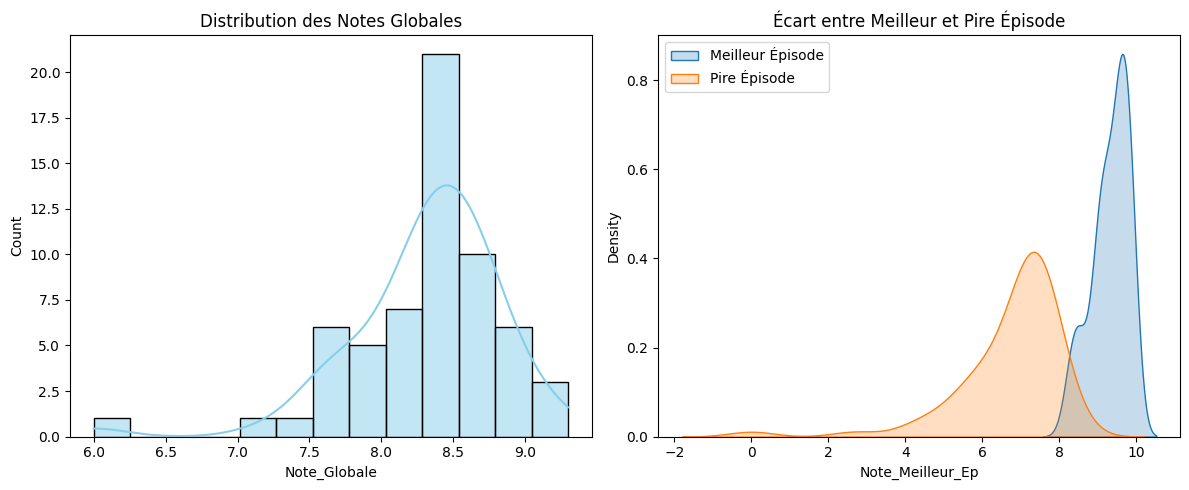

In [4]:
# On crée une figure avec deux graphiques côte à côte
plt.figure(figsize=(12, 5))

# Graphique 1 : Distribution de la Note Globale
plt.subplot(1, 2, 1)
sns.histplot(df['Note_Globale'], kde=True, color="skyblue")
plt.title('Distribution des Notes Globales')

# Graphique 2 : Comparaison Meilleur vs Pire Épisode
plt.subplot(1, 2, 2)
sns.kdeplot(df['Note_Meilleur_Ep'], label='Meilleur Épisode', fill=True)
sns.kdeplot(df['Note_Pire_Ep'], label='Pire Épisode', fill=True)
plt.title('Écart entre Meilleur et Pire Épisode')
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
# 1. Calcul de l'écart (instabilité)
df['Ecart'] = df['Note_Meilleur_Ep'] - df['Note_Pire_Ep']

# 2. Calcul de la régularité (Score sur 10)
# Plus l'écart est petit, plus l'animé est régulier
df['Regularite'] = 10 - df['Ecart']

# 3. Création du Score Éditorial
# On donne 70% d'importance à la Note Globale et 30% à la Régularité
df['Score_Editorial'] = (df['Note_Globale'] * 0.7) + (df['Regularite'] * 0.3)

# On affiche les 5 premiers pour voir le résultat 
df[['Anime', 'Note_Globale', 'Regularite', 'Score_Editorial']].head()

,Anime,Note_Globale,Regularite,Score_Editorial
0,Naruto,8.4,6.2,7.74
1,Trigun,8.2,7.4,7.96
2,Dragon Ball Z,8.7,6.5,8.04
3,Fullmetal Alchemist: Brotherhood,9.1,6.7,8.38
4,Cowboy Bebop,8.8,7.5,8.41


--- TOP 10 : SCORE ÉDITORIAL (Les choix 'sûrs') ---


,Anime,Score_Editorial,Note_Globale,Regularite
35,Frieren: Beyond Journey's End,8.88,9.3,7.9
21,Steins;Gate,8.80,9.1,8.1
44,Monster,8.72,8.9,8.3
53,Vinland Saga,8.71,8.8,8.5
43,Your Lie in April,8.69,8.6,8.9
13,Les Carnets de l'apothicaire,8.68,8.8,8.4
31,Mushishi,8.67,8.7,8.6
45,Hajime no Ippo,8.65,8.8,8.3
52,Chainsaw Man,8.58,8.4,9.0
15,Du mouvement de la Terre,8.55,8.4,8.9


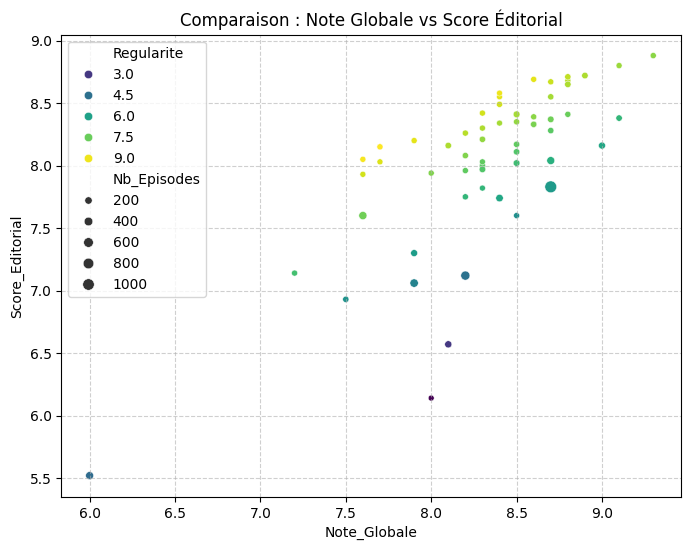

In [6]:
# 1. On crée deux classements : un par Note Globale, un par Score Éditorial
top_global = df.sort_values(by='Note_Globale', ascending=False).head(10)
top_editorial = df.sort_values(by='Score_Editorial', ascending=False).head(10)

# 2. On affiche le Top 10 de notre nouveau score
print("--- TOP 10 : SCORE ÉDITORIAL (Les choix 'sûrs') ---")
display(top_editorial[['Anime', 'Score_Editorial', 'Note_Globale', 'Regularite']])

# 3. Visualisation : Corrélation entre Note Globale et Score Éditorial
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Note_Globale', y='Score_Editorial', hue='Regularite', palette='viridis', size='Nb_Episodes')
plt.title('Comparaison : Note Globale vs Score Éditorial')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [7]:
# 1. Segmentation des animés selon critères définis
def segmenter_anime(row):
    if row['Score_Editorial'] >= 8.5 and row['Regularite'] >= 8:
        return "Chef-d'œuvre"
    elif row['Note_Globale'] >= 8.5 and row['Regularite'] < 7:
        return "Très bon mais inégal"
    elif row['Note_Globale'] >= 7.5 and row['Regularite'] < 6:
        return "Culte mais risqué"
    else:
        return "À surveiller"

# 2. On applique la fonction sur chaque ligne du tableau
df['Segmentation'] = df.apply(segmenter_anime, axis=1)

# 3. On compte combien on en a dans chaque catégorie
print("--- Répartition des animés ---")
print(df['Segmentation'].value_counts())

# 4. On affiche quelques exemples pour vérifier (10 premiers ( .head(10) ))
display(df[['Anime', 'Score_Editorial', 'Regularite', 'Segmentation']].head(10))

--- Répartition des animés ---
Segmentation
À surveiller            38
Chef-d'œuvre            10
Très bon mais inégal     7
Culte mais risqué        6
Name: count, dtype: int64


,Anime,Score_Editorial,Regularite,Segmentation
0,Naruto,7.74,6.2,À surveiller
1,Trigun,7.96,7.4,À surveiller
2,Dragon Ball Z,8.04,6.5,Très bon mais inégal
3,Fullmetal Alchemist: Brotherhood,8.38,6.7,Très bon mais inégal
4,Cowboy Bebop,8.41,7.5,À surveiller
5,Sword Art Online,7.14,7.0,À surveiller
6,Re:Zero,8.08,7.8,À surveiller
7,Dr. Stone,8.21,8.0,À surveiller
8,One Piece,7.83,5.8,Très bon mais inégal
9,Blue Lock,7.75,6.7,À surveiller


In [8]:
def recommander_anime_sur(nom_anime):
    # 1. Trouver le genre de l'animé choisi
    genre_cible = df[df['Anime'] == nom_anime]['Genre_Tags'].values[0]
    
    # 2. Chercher les autres animés du même genre
    # On exclut l'animé lui-même et on ne garde que les "Chefs-d'œuvre" ou "Très bon"
    recommandations = df[
        (df['Genre_Tags'] == genre_cible) & 
        (df['Anime'] != nom_anime) &
        (df['Segmentation'].isin(["Chef-d'œuvre", "Très bon mais inégal"]))
    ].sort_values(by='Score_Editorial', ascending=False)
    
    print(f"Parce que vous avez aimé '{nom_anime}' ({genre_cible}), nous vous recommandons ces valeurs sûres :")
    return recommandations[['Anime', 'Score_Editorial', 'Segmentation']].head(3)

# Testons avec Naruto
recommander_anime_sur("Naruto")

Parce que vous avez aimé 'Naruto' (Action / Shonen), nous vous recommandons ces valeurs sûres :


,Anime,Score_Editorial,Segmentation
2,Dragon Ball Z,8.04,Très bon mais inégal


In [9]:
# Sauvegarde du fichier final avec tes nouveaux calculs
df.to_csv('animes_final_calcule.csv', index=False)
print("Fichier 'animes_final_calcule.csv' enregistré avec succès ! C'est ton livrable n°2.")

Fichier 'animes_final_calcule.csv' enregistré avec succès ! C'est ton livrable n°2.


In [10]:
# Export des graphiques en images PNG

# 1. Export du graphique de distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Note_Globale'], kde=True, color="skyblue")
plt.subplot(1, 2, 2)
sns.kdeplot(df['Note_Meilleur_Ep'], label='Meilleur Épisode', fill=True)
sns.kdeplot(df['Note_Pire_Ep'], label='Pire Épisode', fill=True)
plt.legend()
plt.savefig('distribution_notes.png') # Sauvegarde l'image
plt.close()

# 2. Export du graphique de corrélation (Note vs Score)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Note_Globale', y='Score_Editorial', hue='Regularite', palette='viridis', size='Nb_Episodes')
plt.title('Comparaison : Note Globale vs Score Éditorial')
plt.savefig('correlation_score.png') # Sauvegarde l'image
plt.close()

print("Images sauvegardées ! 'correlation_score.png' et 'distribution_notes.png'")

Images sauvegardées ! 'correlation_score.png' et 'distribution_notes.png'
